In [33]:
import pandas as pd
data = pd.read_excel('Pluvial_Flood_Dataset.xlsx')
data

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High
...,...,...,...,...,...,...,...,...,...,...
144396,3.864167,7.311667,70.837776,1.296000e+09,272.489563,-8.552538,1.0,211.7292,63.087945,Low
144397,3.864444,7.311667,72.578880,1.296000e+09,295.559967,-9.347733,0.0,220.4144,60.489041,Moderate
144398,3.864722,7.311667,70.667946,6.480000e+09,322.125031,-9.236161,0.0,216.3101,62.886849,Low
144399,3.859722,7.311389,61.980232,1.296000e+09,183.814072,-8.819514,0.0,214.3301,66.044932,Low


In [3]:
data['SUSCEP'].unique()

array(['Very_High', 'High', 'Moderate', 'Low', 'No_Flood'], dtype=object)

In [22]:
min(data['Slope']), max(data['Slope'])

(-3.40282306073709e+38, 86.5754089355468)

C:\Users\ivan\AppData\Local\Temp\ipykernel_8264\920548985.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


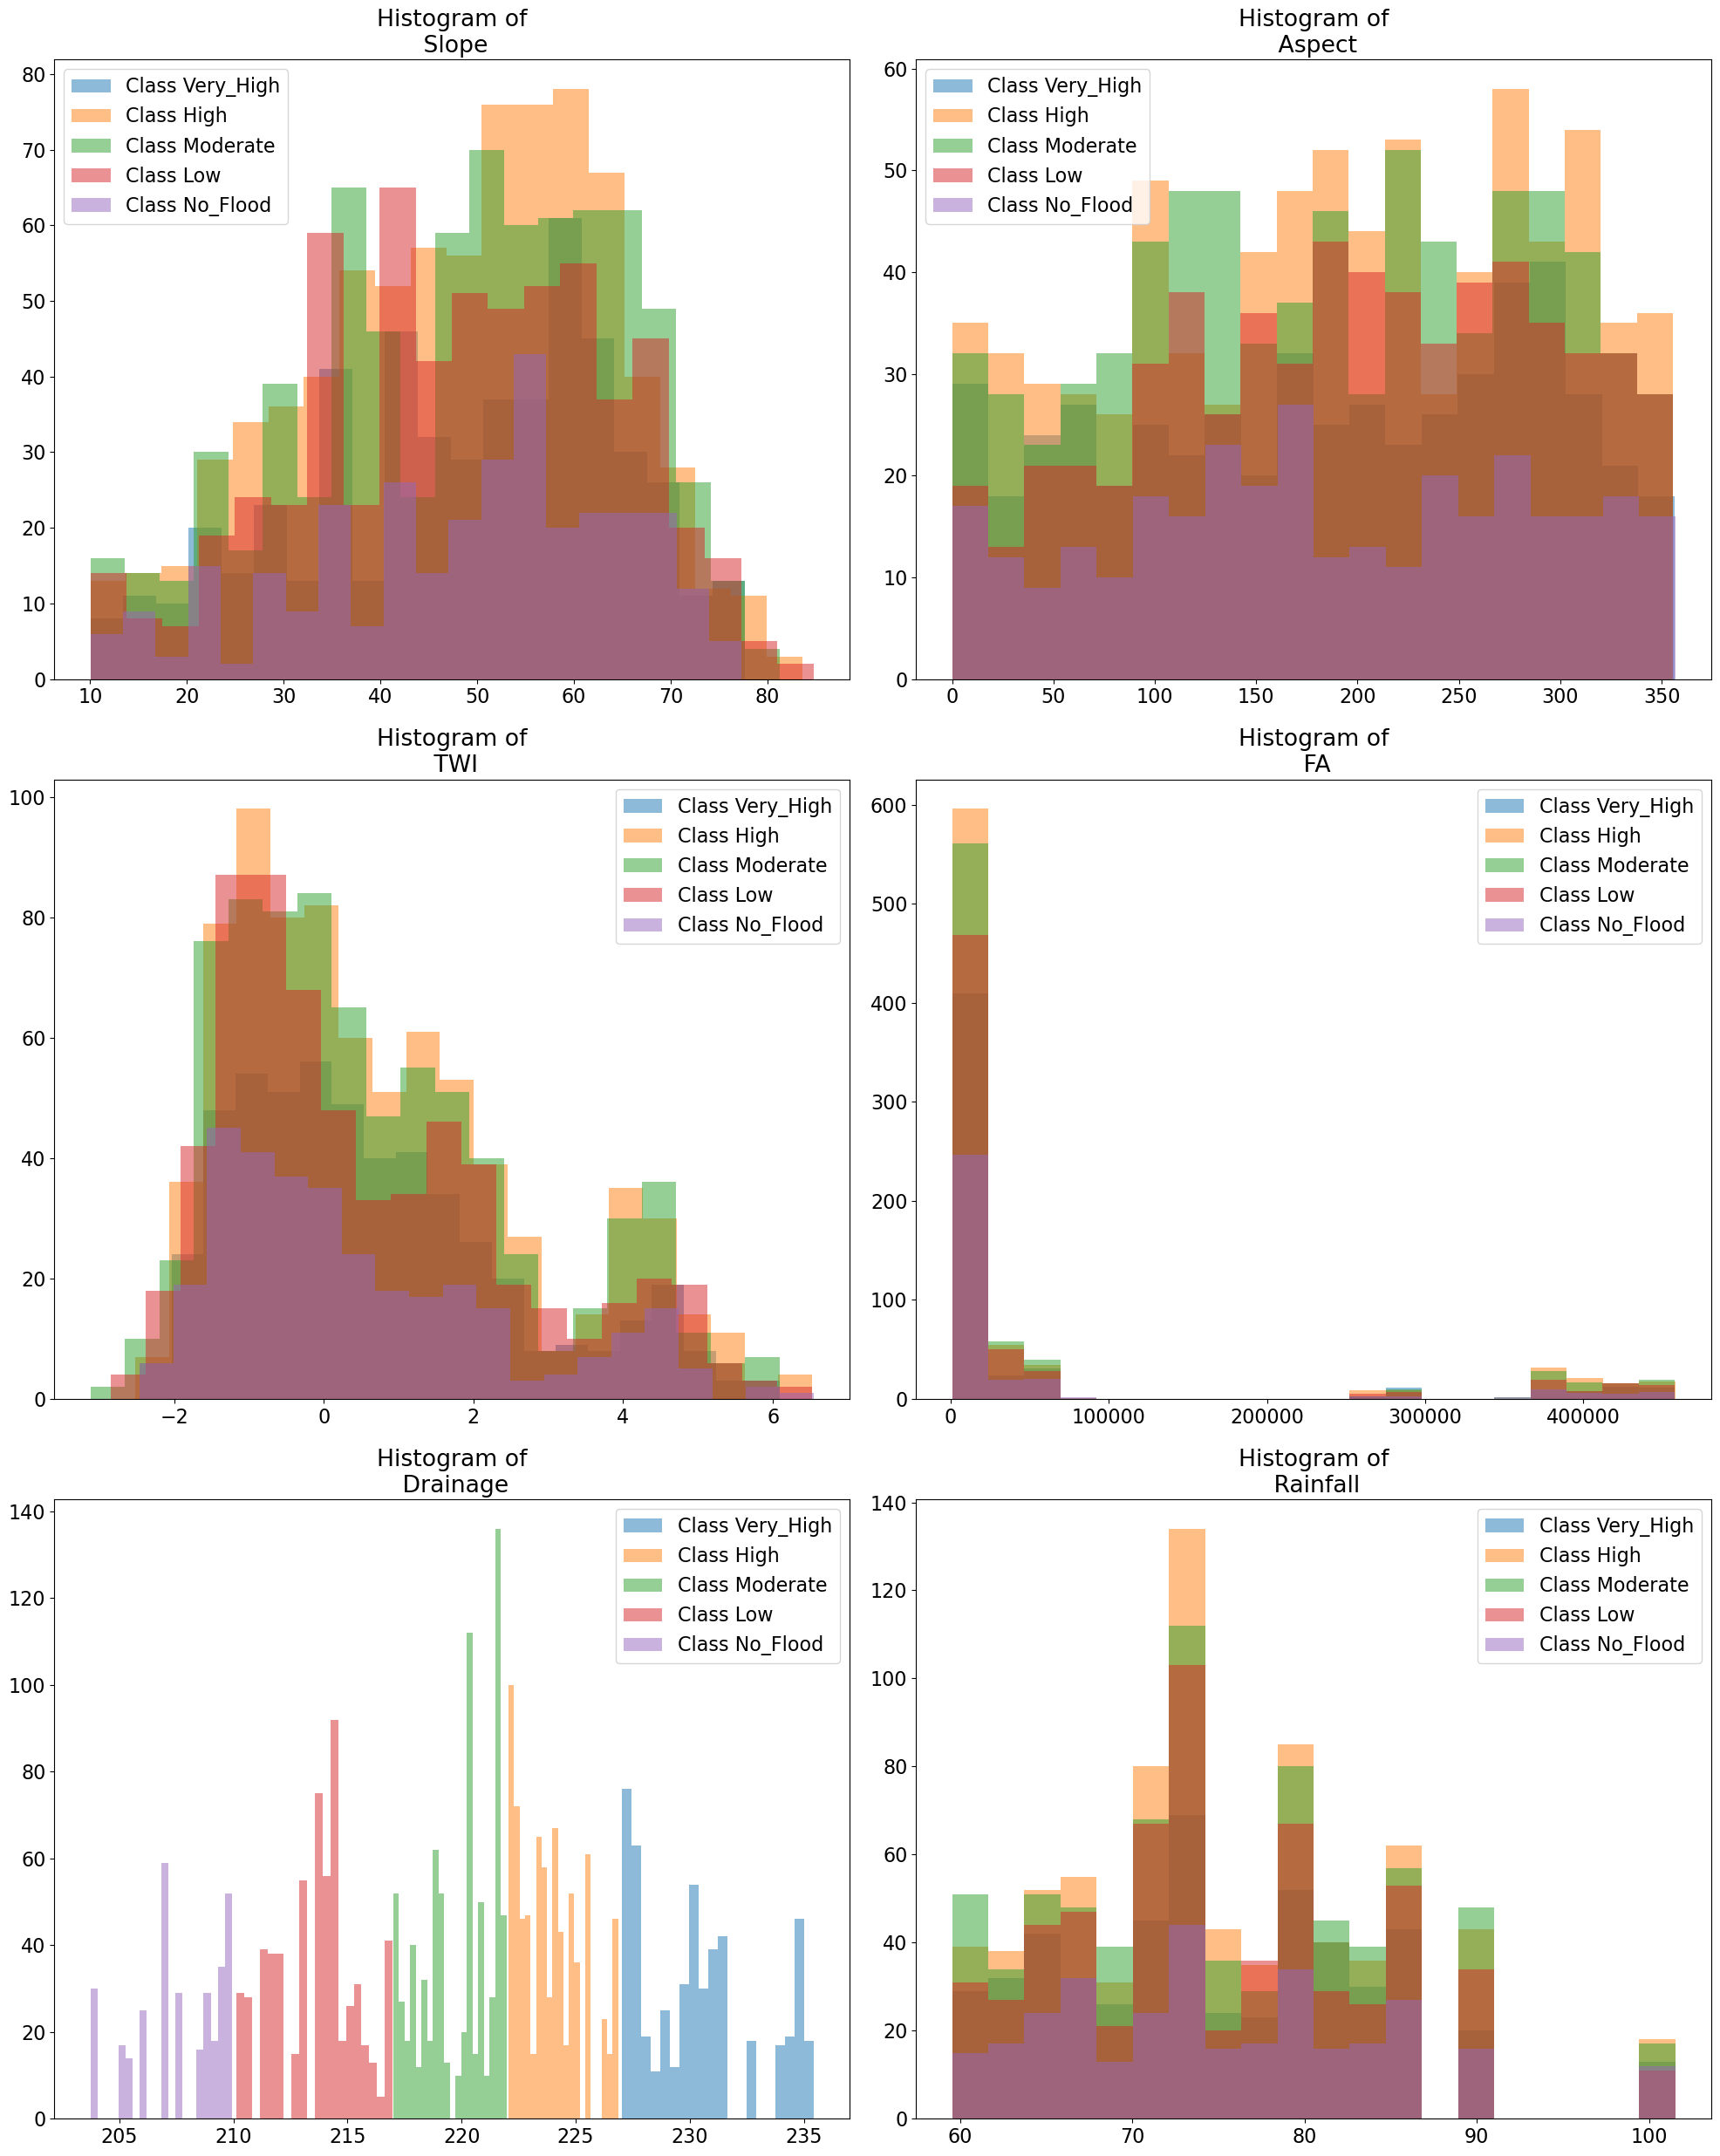

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('Pluvial_Flood_Dataset.xlsx')


df_filtered = data[(data['Slope'] >= 0) & (data['Aspect'] >= 0)
                   & (data['TWI'] >= -100) & (data['FA'] >= 0) & (data['FA'] < 50000)]


df_filtered = df_filtered.dropna()

float_list = ['Slope', 'Aspect', 'TWI', 'FA', 'Drainage', 'Rainfall']

# Unique classes in the 'Class' column
unique_classes = df_filtered['SUSCEP'].unique()

# Number of rows and columns for subplots
n_rows = 3
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over them

# Set the font size
plt.rcParams.update({'font.size': 16})

# Plot histograms
for idx, col in enumerate(float_list):
    ax = axes[idx]
    for cls in unique_classes:
        # Filter data by class
        filtered_data = df_filtered[df_filtered['SUSCEP'] == cls]
        # Calculate the optimal number of bins
        ax.hist(filtered_data[col], bins=20, alpha=0.5, label=f'Class {cls}')
    ax.set_title(f'Histogram of\n {col}')
    ax.legend()


# Hide unused subplots if there are any
for j in range(len(float_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('hists.pdf')
# Show the plot
plt.show()

In [1]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import MarkerCluster

# Load the data
df_filtered = pd.read_excel('data.xlsx')

# Unique classes in the 'SUSCEP' column
unique_classes = df_filtered['SUSCEP'].unique()
# Updated colors for risk levels
colors = ['red', 'orange', 'yellow', 'lightblue', 'green']  # Adjusted color scheme

# Create the map
m = folium.Map(location=[df_filtered['Y'].mean(), df_filtered['X'].mean()], zoom_start=12)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(m)

# Create markers for each point
for _, row in df_filtered.iterrows():
    # Determine marker color based on 'SUSCEP' class
    color = colors[list(unique_classes).index(row['SUSCEP'])]
    
    # Add marker to the map
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=f"Slope: {row['Slope']}<br>Aspect: {row['Aspect']}<br>TWI: {row['TWI']}<br>FA: {row['FA']}<br>Drainage: {row['Drainage']}<br>Rainfall: {row['Rainfall']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Function to create HTML legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 250px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Very High &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; High &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
     &nbsp; Moderate &nbsp; <i class="fa fa-map-marker fa-2x" style="color:yellow"></i><br>
     &nbsp; Low &nbsp; <i class="fa fa-map-marker fa-2x" style="color:lightblue"></i><br>
     &nbsp; No Flood &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to a file
m.save('pluvial_flood_map_with_legend.html')


C:\Users\ivan\AppData\Local\Temp\ipykernel_8648\2224417140.py:29: UserWarning: color argument of Icon should be one of: {'cadetblue', 'darkblue', 'black', 'darkred', 'beige', 'green', 'pink', 'red', 'orange', 'lightgray', 'purple', 'darkpurple', 'lightblue', 'gray', 'blue', 'lightred', 'white', 'darkgreen', 'lightgreen'}.
  icon=folium.Icon(color=color)


In [2]:
import pandas as pd
import folium

df_filtered = pd.read_excel('data.xlsx')

# Уникальные классы в столбце 'SUSCEP'
unique_classes = df_filtered['SUSCEP'].unique()
colors = ['red', 'orange', 'yellow', 'lightblue', 'green']  # Adjusted color scheme

# Создание карты
m = folium.Map(location=[df_filtered['Y'].mean(), df_filtered['X'].mean()], zoom_start=12)

# Создание FeatureGroup для точек
fg = folium.FeatureGroup(name='Points').add_to(m)

# Добавление точек на карту
for _, row in df_filtered.iterrows():
    # Определение цвета в зависимости от класса 'SUSCEP'
    color = colors[list(unique_classes).index(row['SUSCEP'])]
    
    # Добавление круглой точки на карту
    folium.Circle(
        location=[row['Y'], row['X']],
        radius=5,  # Радиус точки
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Slope: {row['Slope']}<br>Aspect: {row['Aspect']}<br>TWI: {row['TWI']}<br>FA: {row['FA']}<br>Drainage: {row['Drainage']}<br>Rainfall: {row['Rainfall']}"
    ).add_to(fg)

# Функция для создания HTML легенды
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 250px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp; <b>Legend</b> <br>
     &nbsp; Very High &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; High &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
     &nbsp; Moderate &nbsp; <i class="fa fa-map-marker fa-2x" style="color:yellow"></i><br>
     &nbsp; Low &nbsp; <i class="fa fa-map-marker fa-2x" style="color:lightblue"></i><br>
     &nbsp; No Flood &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
</div>
'''

# Добавление легенды на карту
m.get_root().html.add_child(folium.Element(legend_html))

# Сохранение карты в файл
m.save('pluvial_flood_map_with_legend_.html')

# Для отображения карты в Jupyter Notebook (если используете)
#m


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os

# Load the dataset
data = pd.read_excel('data.xlsx')

# Split data into features and target
X = data.drop(['SUSCEP'], axis=1)
y = data['SUSCEP']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the search space for hyperparameters
search_space = {
    'num_layers': np.arange(1, 20),  # Number of layers
    'neurons_per_layer': np.arange(1, 128, 1),  # Neurons per layer
    'activation_functions': ['relu', 'sigmoid', 'tanh', 'softmax', 'softplus',
                             'softsign', 'elu', 'selu', 'gelu', 'hard_sigmoid', 'linear'],  # Activation functions
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'],  # Optimizers
    'alphas': [0.0001, 0.001, 0.01, 0.1],  # Learning rates
    'loss_functions': ['categorical_crossentropy']#, 'sparse_categorical_crossentropy']
}

# Function to get optimizer object
def get_optimizer(name, alpha):
    optimizers = {
        'adam': Adam(learning_rate=alpha),
        'sgd': SGD(learning_rate=alpha),
        'rmsprop': RMSprop(learning_rate=alpha),
        'adagrad': Adagrad(learning_rate=alpha),
        'adadelta': Adadelta(learning_rate=alpha),
        'adamax': Adamax(learning_rate=alpha),
        'nadam': Nadam(learning_rate=alpha)
    }
    return optimizers[name]

# Define the fitness function
def evaluate_model(params, individual_id):
    num_layers = params['num_layers']
    neurons_per_layer = params['neurons_per_layer']
    activation_functions = params['activation_functions']
    optimizer_name = params['optimizer']
    alpha = params['alpha']
    loss_function = params['loss_function']
    
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], activation=activation_functions[0], input_shape=(X_train.shape[1],)))
    for i in range(1, num_layers):
        model.add(Dense(neurons_per_layer[i], activation=activation_functions[i]))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    optimizer = get_optimizer(optimizer_name, alpha)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(true_classes, predicted_classes)
    
    # Save parameters to a .txt file
    with open(f'individuals/individual_{individual_id}_params.txt', 'w') as file:
        file.write(f'num_layers: {num_layers}\n')
        file.write(f'neurons_per_layer: {neurons_per_layer}\n')
        file.write(f'activation_functions: {activation_functions}\n')
        file.write(f'optimizer: {optimizer_name}\n')
        file.write(f'alpha: {alpha}\n')
        file.write(f'loss_function: {loss_function}\n')
        file.write(f'accuracy: {accuracy}\n')
    
    # Save loss history to a .txt file
    with open(f'individuals/individual_{individual_id}_loss_history.txt', 'w') as file:
        for loss in history.history['loss']:
            file.write(f'{loss}\n')
    
    # Save y_test and y_pred to a .txt file
    with open(f'individuals/individual_{individual_id}_predictions.txt', 'w') as file:
        for index, true, pred in zip(list(range(len(true_classes))), true_classes, predicted_classes):
            file.write(f'{index}, {true}, {pred}\n')
    
    return accuracy

# Define the genetic algorithm operations
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        num_layers = np.random.choice(search_space['num_layers'])
        neurons_per_layer = np.random.choice(search_space['neurons_per_layer'], num_layers).tolist()
        activation_functions = np.random.choice(search_space['activation_functions'], num_layers).tolist()
        optimizer = np.random.choice(search_space['optimizers'])
        alpha = np.random.choice(search_space['alphas'])
        loss_function = np.random.choice(search_space['loss_functions'])
        chromosome = {
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'activation_functions': activation_functions,
            'optimizer': optimizer,
            'alpha': alpha,
            'loss_function': loss_function
        }
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    child = {}
    child['num_layers'] = np.random.choice([parent1['num_layers'], parent2['num_layers']])
    child['neurons_per_layer'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['neurons_per_layer'], parent2['neurons_per_layer'])]
    child['activation_functions'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['activation_functions'], parent2['activation_functions'])]
    child['optimizer'] = np.random.choice([parent1['optimizer'], parent2['optimizer']])
    child['alpha'] = np.random.choice([parent1['alpha'], parent2['alpha']])
    child['loss_function'] = np.random.choice([parent1['loss_function'], parent2['loss_function']])
    # Adjust the lists to the number of layers
    child['neurons_per_layer'] = child['neurons_per_layer'][:child['num_layers']]
    child['activation_functions'] = child['activation_functions'][:child['num_layers']]
    return child

def mutate(chromosome):
    key_to_mutate = np.random.choice(['num_layers', 'neurons_per_layer', 'activation_functions', 'optimizer', 'alpha', 'loss_function'])
    if key_to_mutate == 'num_layers':
        chromosome[key_to_mutate] = np.random.choice(search_space['num_layers'])
        chromosome['neurons_per_layer'] = np.random.choice(search_space['neurons_per_layer'], chromosome[key_to_mutate]).tolist()
        chromosome['activation_functions'] = np.random.choice(search_space['activation_functions'], chromosome[key_to_mutate]).tolist()
    elif key_to_mutate == 'neurons_per_layer':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['neurons_per_layer'])
    elif key_to_mutate == 'activation_functions':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['activation_functions'])
    elif key_to_mutate == 'optimizer':
        chromosome[key_to_mutate] = np.random.choice(search_space['optimizers'])
    elif key_to_mutate == 'alpha':
        chromosome[key_to_mutate] = np.random.choice(search_space['alphas'])
    elif key_to_mutate == 'loss_function':
        chromosome[key_to_mutate] = np.random.choice(search_space['loss_functions'])
    
    # Adjust the lists to the number of layers
    chromosome['neurons_per_layer'] = chromosome['neurons_per_layer'][:chromosome['num_layers']]
    chromosome['activation_functions'] = chromosome['activation_functions'][:chromosome['num_layers']]
    
    return chromosome

def select_parents(population, num_parents):
    sorted_population = sorted(population, key=lambda x: x['fitness'], reverse=True)
    return sorted_population[:num_parents]

# Define the genetic algorithm parameters
population_size = 1000
num_generations = 10
num_parents_to_select = 10

# Initialize the population
population = initialize_population(population_size)

# Store parameters and accuracies on each iteration
results = []

# Main loop of the genetic algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    for i, individual in enumerate(population):
        individual['fitness'] = evaluate_model(individual, f'g{generation}_i{i}')
    
    # Store parameters and accuracies
    for individual in population:
        result = {
            'num_layers': individual['num_layers'],
            'neurons_per_layer': individual['neurons_per_layer'],
            'activation_functions': individual['activation_functions'],
            'optimizer': individual['optimizer'],
            'alpha': individual['alpha'],
            'loss_function': individual['loss_function'],
            'accuracy': individual['fitness']
        }
        results.append(result)
    
    # Select the best individuals as parents for the next generation
    parents = select_parents(population, num_parents_to_select)
    
    # Generate offspring through crossover and mutation
    offspring = []
    while len(offspring) < population_size:
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        child = crossover(parent1, parent2)
        if np.random.rand() < 0.1:  # Mutation probability
            child = mutate(child)
        offspring.append(child)
    
    # Replace the old population with the offspring
    population = offspring

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('genetic_algorithm_results.csv', index=False)


19/19 [==============================] - 0s 2ms/step


19/19 [==============================] - 0s 2ms/step


19/19 [==============================] - 0s 2ms/step
